<a href="https://colab.research.google.com/github/garestrear/ninja-pythonist/blob/master/NPS_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Means

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.
The real world applications of K-Means include:
customer profiling

*  market segmentation
* computer vision
* Search engines
* astronomy
* Mesh generation


## Clusterization

Es un conjunto de técnicas que permiten encontrar *subgrupos* o *clusters* en un conjunto de datos, de tal manera que encontramos una particion del conjunto de observaciones en la cual, dos observaciones pertenecen al mismo subgrupo si son similares (de acuerdo a algun criterio), mientras que dos observaciones pertenecen a grupos distintos si no son similares.



## K-Means
$ x^2$

Si se tiene un conjunto de datos observados, queremos agrupar estos datos en $K$ grupos que no se traslapan. En este caso se debe especificar el número de grupos $K$.

Sea $C_1,\dots, C_K$ los conjuntos que contienen los indices de las observaciones en cada cluster. Se debe cumplir que:



*   $\bigcup_{i=1}^{K}C_i = \{X1, X2, \dots, Xn\}$.
*   $C_k \cap C_j = \emptyset$, para todo $k \neq j$.

Se busca que la variabilidad dentro de un cluster sea lo mas pequeña posible. Si $C_k$ es un cluster, definimos $W(C_k)$ como la cantidad por la cual las observaciones dentro de un cluster difieren entre sí.

Por tanto resolveremos el problema

$$\min_\limits{C_1, C_2, \cdots, C_K}\left\{{\sum_{k = 1}^{K} W(C_k)}\right\}$$

Donde,

$$W(C_k) = \frac{1}{|C_k|}\sum_{i', i \in C_k}||\vec{x_{i'}} - \vec{x_{i}}||^2 = \frac{1}{|C_k|}\sum_{i', i \in C_k}\sum_{j = 1}^{p}(x_{i'j} - x_{ij})^2$$



### Algoritmo

1. Asigne un numero de 1 a $K$ de manera aleatoria a cada una de las observaciones del conjunto.
2. Itere los siguientes pasos hasta que el agrupamiento pare de cambiar:


> 2.1. Para cada cluster, compute el centroide de dicho cluster.

> 2.2. Asigne cada observación al cluster con el centroide más cercano usando la distancia euclidiana.

Este algoritmo encuentra un óptimo local para el objetivo de la optimización. Más aún, el objetivo a minimizar decrece constantemenete durante el proceso de optimización, pues

$$\frac{1}{|C_k|}\sum_{i', i \in C_k}\sum_{j = 1}^{p}(x_{i'j} - x_{ij})^2 = 2\sum_{i \in C_k}\sum_{j = 1}^{p}(x_{ij} - c_{kj})^2$$

Donde $c_{kj} = \frac{1}{|C_k|}\sum_{i \in C_k}x_{ij}$, que en otras palabras es la $j$-ésima componente del centroide del cluster $C_k$.














In [0]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image('/content/drive/Shared drives/Seminario Machine Learning/Colab Notebooks/Imagenes/Kmeans.png')

KeyboardInterrupt: ignored

### Implementación en Python

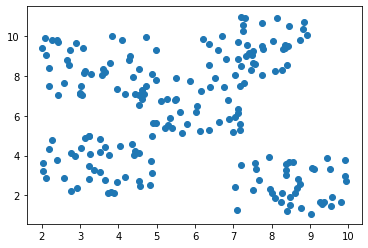

In [0]:
# Generating data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

origin_points = [[2, 2,4], [4.5, 5,6], [6, 8,3], [2, 7,1], [7, 1,4]]

points_per_cluster = 40
dispersion = 3

X = list()
x_axis = list()
y_axis = list()

for origin_point in origin_points:
  x_coordinates = dispersion * np.random.rand(1, points_per_cluster);
  y_coordinates = dispersion * np.random.rand(1, points_per_cluster);
  z_coordinates = dispersion * np.random.rand(1, points_per_cluster);

  for i in range(len(x_coordinates[0])):
    x = origin_point[0] + x_coordinates[0][i]
    y = origin_point[1] + y_coordinates[0][i]
    z = origin_point[2] + z_coordinates[0][i]

    x_axis.append(x)
    y_axis.append(y)
    # z_axis.append(z)

    X.append([x, y,z])

X_numpy = np.array(X, dtype = np.float)

# Scaling data. This is very important !
X_numpy = scale(X_numpy)

# Plot original data before scaling and centering
plt.scatter(x_axis, y_axis)

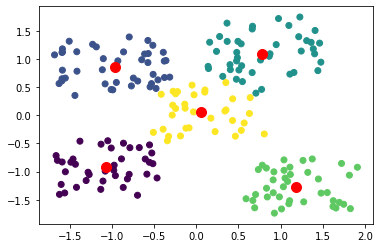

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means fitting

cluster_number = 4

kmeans_model = KMeans(n_clusters = cluster_number)
kmeans_model.fit(X_numpy)

plt.scatter(X_numpy[:, 0], X_numpy[:, 1], c = kmeans_model.labels_)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], c = "red", s = 100)


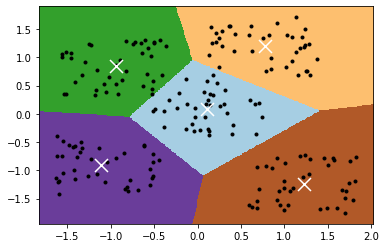

In [0]:
# Codigo tomado de https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

h = .01
x_min, x_max = X_numpy[:, 0].min() - 0.2, X_numpy[:, 0].max() + 0.2
y_min, y_max = X_numpy[:, 1].min() - 0.2, X_numpy[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_numpy[:, 0], X_numpy[:, 1], 'k.')
# Plot the centroids as a white X
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

### Graficas de codo para determinar un $K$ adecuado

Text(0, 0.5, 'WSS')

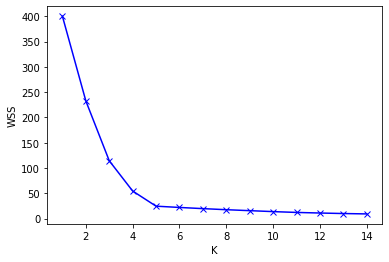

In [0]:
WSS = []
k_test = range(1, 15)

for k in k_test:
  kmeans_model_test = KMeans(n_clusters = k)
  kmeans_model_test.fit(X_numpy)
  WSS.append(kmeans_model_test.inertia_)

plt.plot(k_test, WSS, 'bx-')
plt.xlabel("K")
plt.ylabel("WSS")
plt.title("Elbow graph")

### Limitaciones de K-Means


Es importante resaltar que las fronteras entre los grupos son lineales, y por tanto K-means falla al agrupar conjuntos con geometrías más complejas, pero esto se puede solucionar mediante la aplicación de transformaciones kernel como se observó en SVM. (Ver Spectral Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) 

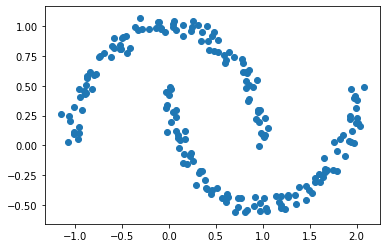

In [0]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise = 0.05)
plt.scatter(X[:,0], X[:,1])

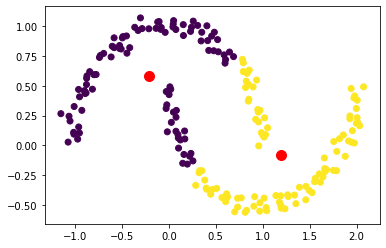

In [0]:
kmeans_model_moon = KMeans(n_clusters = 2)
kmeans_model_moon.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = kmeans_model_moon.labels_)
plt.scatter(kmeans_model_moon.cluster_centers_[:, 0], kmeans_model_moon.cluster_centers_[:, 1], c = "red", s = 100)

# Referencias
*   KMeans Class (Sklearn): https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
*   In Depth: k-Means Clustering: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
*   An Introduction to Statistical Learning with applications in R.
*   The Elements of Statistical Learning.


